# Exploring the Global Warming Levels Approach in the Analytics Engine

In this notebook, we will explore the scientific methods for studying climate change impacts with the Global Warming Level (GWL) approach. This notebook will:

* Describe and illustrate the scientific method of using Global Warming Levels
* Demonstrate the tools that the Analytics Engine and ClimakitAE have for working with data on Global Warming Levels
* Provide a comparison between the workflow and results when planning with GWLs compared to using an SSP-based (or time-based) approach


From this notebook, we will understand:
- The different approaches towards understanding global warming levels
- Calculating a metric on both approaches' datasets to see what are the differences

**Intended Application:** As a user, I want to  **<span style="color:#FF0000">understand the differences between a traditional SSP approach and the new Global Warming Levels framework, and use cases where I would consider a Global Warming Levels framework over a traditional SSP approach.</span>**

**Runtime**: With the default settings, this notebook takes approximately **TODO: FILL HERE** to run from start to finish. Modifications to selections may increase the runtime.

## Step 1: Conceptual explanation of GWL

**Insert conceptual explanation of GWL here**

## Step 2: Using AE to load climate data on GWLs

In [1]:
# Cells that are only temporarily needed

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In this notebook, we will use a class called `ClimateData` from `climakitae` to help us retrieve climate data. For more information about how it works, check out **this notebook (TODO: HYPERLINK) here**. The below examples demonstrate basic usage of how to use `ClimateData`.

**This notebook will use warming levels 0.8 and 2.0 to compare a future climate to a historical one.**

### Option 1: Using the get_data function

In [8]:
from climakitae.core.data_interface import (
    get_data_options, 
    get_subsetting_options, 
    get_data
)

The get_data function can be used to load GWL data by specifying ```approach = "Warming Level"```. The basic features of get_data are documented in the data-access/basic_data_access notebook.

In [9]:
prec_gwl_data = get_data(
    variable = "Precipitation (total)", 
    downscaling_method = "Statistical", 
    resolution = "3 km", 
    timescale = "monthly", 
    approach = "Warming Level",
    # Modify warming level settings 
    warming_level_window = 15, 
    warming_level = [0.8, 2.0]
)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Returned data array is huge. Operations could take 10x to infinity longer than 1GB of data !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

WARNING FOR WARMING LEVELS APPROACH
-----------------------------------
There may be NaNs in your data for certain simulation/warming level combinations if the warming level is not reached for that particular simulation before the year 2100. 

This does not mean you have missing data, but rather a feature of how the data is combined in retrieval to return a single data object. 

If you want to remove these empty simulations, it is recommended to first subset the data object by each individual warming level and then dropping NaN values.


### Option 2: ClimateData object

A new method for loading data through climakitae is currently in development. This approach offers more flexibility and faster performance, but is still actively in development and may undergo slight changes. Here we demonstrate the equivalent data loading operation with the new ClimateData object.

In [10]:
from climakitae.new_core.user_interface import ClimateData

In [11]:
cd = ClimateData()

✅ Ready to query! 


Above, we've created a `ClimateData` object called `cd`, which we will use to grab GWL data below.

In [12]:
# Here is an example of loading data at 2 specific warming levels (0.8 and 2.0) with a 15-year window for Max Temp.
prec_gwl_data = (cd
    .catalog("cadcat") 
    .activity_id("LOCA2") # Statistical downscaling
    .table_id("mon")      # Looking at `monthly` data
    .grid_label("d03")    # Looking at domain 3, which is `3 km` data over California
    .variable("pr")   # Grabbing the preciiptation variable
    .processes({          # Centering our dataset around GWLs
        "warming_level": {
            "warming_levels": [0.8, 2.0], # Standard GWLs include: 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, but any number can be requested
            "warming_level_window": 15, # Default is 15 years on either side of GWL crossing time, for total of 30 years of data
            # "warming_level_months": [6, 7, 8], # Optional: specify months for seasonal averages, still WIP development
        },
    })
    .get()
)

Found 56 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'pr'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


You'll notice we did not have to specify an SSP to load the data because simulations from any SSP can be used to measure climate impacts at a given GWL. This **ability to utilize data from all SSPs equivalently is one of the benefits of the GWL approach**. As you will see below, we receive a data object with 129 simulations, which includes data from simulations of SSP 2-4.5, SSP 3-7.0, and SSP 5-8.5

### What does this data look like?

Let's take a look at the objects and some quick visualizations of the data.

In [13]:
# Looking at the `gwl_data` variable
prec_gwl_data

<xarray.Dataset> Size: 206GB
Dimensions:        (sim: 129, warming_level: 2, time_delta: 360, lat: 495,
                    lon: 559)
Coordinates:
  * sim            (sim) object 1kB 'LOCA2_UCSD_GFDL-ESM4_ssp245_mon_d03_r1i1...
  * warming_level  (warming_level) float64 16B 0.8 2.0
  * lat            (lat) float32 2kB 29.58 29.61 29.64 ... 44.95 44.98 45.02
  * lon            (lon) float32 2kB -128.4 -128.4 -128.4 ... -111.0 -111.0
  * time_delta     (time_delta) int64 3kB -180 -179 -178 -177 ... 177 178 179
    simulation     (sim) <U50 26kB 'LOCA2.UCSD.GFDL-ESM4.ssp245.mon.d03.r1i1p...
    centered_year  (sim, warming_level) int64 2kB 2009 2067 1990 ... 2011 2040
Data variables:
    pr             (sim, warming_level, time_delta, lat, lon) float64 206GB dask.array<chunksize=(1, 1, 12, 255, 255), meta=np.ndarray>
Attributes: (12/101)
    Conventions:                         CF-1.7 CMIP-6.0 UGRID-1.0
    ID_loca_routines_module:             $Id: loca_routines_module.F90,v 1.13...
    SIOCRD_netCDF_Version:               1.0
    SOURCE_loca_routines_module:         $Source: /home6/dwpierc2/src/mine/lo...
    activity_id:                         CMIP
    bias_correction:                     downscaling via PresRat, Pierce et a...
    ...                                  ...
    resolution:                          3 km
    warming_level:                       {'warming_levels': [0.8, 2.0], 'warm...
    filter_unadjusted_models:            yes
    concat:                              Process 'concat' applied to the data...
    update_attributes:                   Process 'update_attributes' applied ...
    warming_level_simple:                Process 'warming_level_simple' appli...

You'll notice that there are two dimensions and one coordinate that are not common in climate data retrieved using an SSP-approach:
1. `warming_level`: This dimension denotes which warming levels the data is centered around, and in this case, we can see the values as 0.8 and 2.0 -- the same as the WLs we chose above.
2. `time_delta`: This dimension represents the offset in timesteps from the `centered_year` of a given simulation. Since each simulation spans 30 years, we can align and stack them along a common `time_delta` axis. Negative values indicate timesteps before the `centered_year`, while positive values indicate timesteps after it.
3. `centered_year`: The year that a given simulation reaches a certain `warming_level`, which will be different for each simulation.

Now, let's take a quick glance at what this data looks like in a couple of figures: **(TODO: This doesn't need to be such complex code, this is just some AI-generated code to make these plots, I can make this cleaner later)**

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [17]:
# Here is an example of loading data at 2 specific warming levels (0.8 and 2.0) with a 15-year window for Max Temp.
tasmax_gwl_data = (cd
    .catalog("cadcat") 
    .activity_id("LOCA2") # Statistical downscaling
    .table_id("mon")      # Looking at `monthly` data
    .grid_label("d03")    # Looking at domain 3, which is `3 km` data over California
    .variable("tasmax")   # Grabbing the preciiptation variable
    .processes({          # Centering our dataset around GWLs
        "warming_level": {
            "warming_levels": [0.8, 2.0], # Standard GWLs include: 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, but any number can be requested
            "warming_level_window": 15, # Default is 15 years on either side of GWL crossing time, for total of 30 years of data
            # "warming_level_months": [6, 7, 8], # Optional: specify months for seasonal averages, still WIP development
        },
    })
    .get()
)

Found 56 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'tasmax'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


Let's calculate a change signal and plot the data for a single model

In [38]:
from warming_level_approach_helpers import *
from climakitae.util.unit_conversions import convert_units

In [36]:
gwl_data = tasmax_gwl_data

arr = convert_units(gwl_data.tasmax.isel(sim=0, time_delta=0), 'degF')
diff = arr.sel(warming_level=arr.warming_level.values[-1]) - arr.sel(
    warming_level=arr.warming_level.values[0]
)

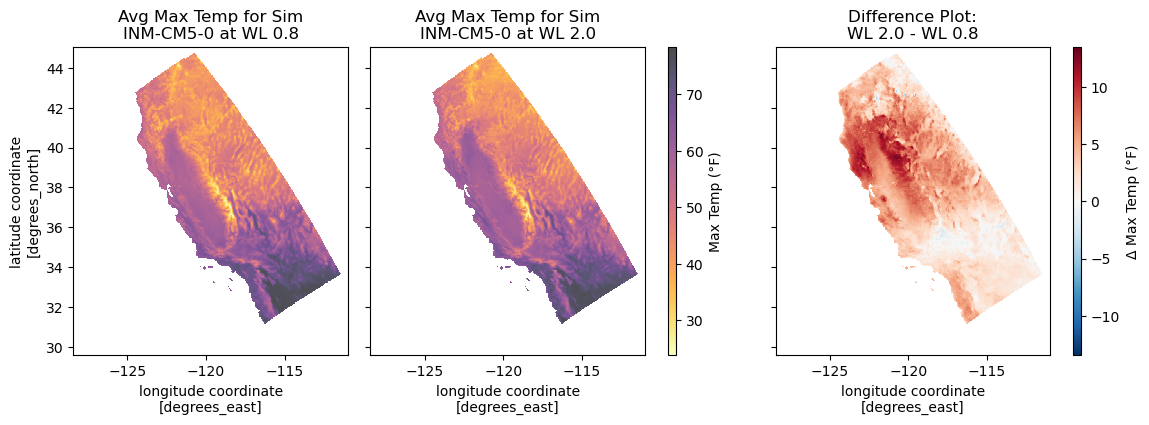

In [37]:
fig1(arr,diff)

## Step 3: Compare methods and resuts between GWL and target-year planning

Now that we've seen the basic process for loading data on GWLs, let's use an example to compare the methods and results of examining climate impacts on GWLs compared to a more traditional target-year approach. 

This example will:
* Demonstrate how the climakit tools make it simple to switch between loading data on GWLs and a time-based approach
* Walk through how to choose equivalent GWL and time-based planning targets
* Illustrate how GWL planning avoids the influence of the "hot model problem"

In [ ]:

But in order to do that, we need to know **when** to grab this data. What are `GWL 2.0 and 0.8` in an SSP-approach? Fortunately, we have a tool to answer this very question.

The `get_year_at_gwl` tool translates GWLs to years using IPCC trajectories. **(TODO: FILL IN MORE)**

To properly compare results between a GWL approach and a time-based target year, we need to first determine **what future target-year is equivalent to each GWL**. 

climakitae has tools that are designed to do this, which are discussed in more detail in the gwl-

In [40]:
from climakitae.util.warming_levels import get_year_at_gwl

#### **Grabbing SSP-equivalent data of WL 0.8**

In [41]:
# Let's see what year the world would reach 0.8 degrees celsius of warming above pre-industrial levels at different SSP trajectories
get_year_at_gwl(0.8, 'all')

,5%,Mean,95%
Historical,1990.0,2002.0,2010.0
SSP 1-1.9,2015.0,2015.0,2015.0
SSP 1-2.6,2015.0,2015.0,2015.0
SSP 2-4.5,2015.0,2015.0,2015.0
SSP 3-7.0,2015.0,2015.0,2015.0
SSP 5-8.5,2015.0,2015.0,2015.0


We'll only be looking at the historical row for WL 0.8, as no simulations reach 0.8 degrees of warming before 2015 (when SSP data begins). 

We'll take a 30-year time slice around the year **2002**.

In [43]:
# Here, we'll use the `ClimateData` object again now to retrieve SSP data.
time_data_08 = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")                    # Statistical downscaling
    .table_id("mon")                         # Looking at `monthly` data
    .grid_label("d03")                       # Looking at `45 km` data
    .variable("tasmax")                      # Grabbing the `max temp` variable
    .experiment_id(["historical", "ssp370"]) # Grabbing historical + SSP 3-7.0 data
    .processes({
        "time_slice": ('1987-01-01', '2016-12-31'), # Only selecting data from 1987 to 2017 (a 30-year slice around the year 2002).
    })
    .get()
)

Found 29 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'experiment_id': ['historical', 'ssp370'], 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'tasmax'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


#### **Grabbing SSP-equivalent data of WL 2.0**

In [44]:
# Let's see what year the world would reach 2.0 degrees celsius of warming above pre-industrial levels at different SSP trajectories
get_year_at_gwl(2.0, 'all')

,5%,Mean,95%
Historical,NaN,NaN,NaN
SSP 1-1.9,NaN,NaN,NaN
SSP 1-2.6,NaN,NaN,NaN
SSP 2-4.5,2039.0,2053.0,2081.0
SSP 3-7.0,2037.0,2047.0,2061.0
SSP 5-8.5,2034.0,2042.0,2054.0


Let's use SSP 3-7.0 for comparison, and take a 30-year time slice of data around the year **2047** (based on the table above).

In [46]:
# Here, we'll use the `ClimateData` object again now to retrieve SSP data.
time_data_20 = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")                    # Statistical downscaling
    .table_id("mon")                         # Looking at `monthly` data
    .grid_label("d03")                       # Looking at `45 km` data
    .variable("tasmax")                      # Grabbing the `max temp` variable
    .experiment_id(["historical", "ssp370"]) # Grabbing historical + SSP 3-7.0 data
    .processes({
        "time_slice": ('2033-01-01', '2062-12-31'), # Only selecting data from 2033 to 2062 (a 30-year slice around the year 2047).
    })
    .get()
)

Found 29 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'experiment_id': ['historical', 'ssp370'], 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'tasmax'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


### Do some analysis on the data we loaded

We will conduct a comparison of the two datasets by analyzing future climate projections against historical baselines. Specifically, we will calculate the difference in **average in yearly maximum air temperature between a 2.0°C and 0.8°C warming world**, and evaluate how these changes align with their time-based components.

In [47]:
from climakitae.core.data_load import load
from climakitae.util.utils import add_dummy_time_to_wl
from climakitae.util.unit_conversions import convert_units

For this analysis, we'll clip the data to an area of interest. We've just a gridcell in Ventura County for this example. **(TODO: This can change to a shapefile or some other shape or area)**

In [48]:
# We're going to clip our data to the gridcell of interest
lat = 34.379151
lon = -119.194058

gwl_data_onecell = gwl_data.sel(lat=lat, lon=lon, method='nearest')
time_data_08_onecell = time_data_08.sel(lat=lat, lon=lon, method='nearest')
time_data_20_onecell = time_data_20.sel(lat=lat, lon=lon, method='nearest')

Now that our data is clipped, let's analyze both our GWL data and our SSP data.

#### GWL-approach analysis

In [49]:
# Calculating the `Average Yearly Max Air Temperature` for a GWL 0.8 and 2.0.
loca_gwl_data = add_dummy_time_to_wl(gwl_data_onecell.tasmax, freq_name="monthly")
loca_gwl_maxx = loca_gwl_data.groupby('time.year').max()
loca_gwl_maxx = load(loca_gwl_maxx, progress_bar=True)

# Converting units to degF
loca_gwl = convert_units(loca_gwl_maxx, 'degF')

Processing data to read 60.47 KB of data into memory... 
[########################################] | 100% Completed | 124.65 s
Complete!


In [50]:
# Taking the delta between GWLs
gwl_delta = loca_gwl.sel(warming_level=2.0).mean(dim='year') - loca_gwl.sel(warming_level=0.8).mean(dim='year')

#### Time-based approach analysis

In [51]:
# Calculating the `Average Yearly Max Air Temperature` for the time-periods corresponding to GWL 0.8 and 2.0.
loca_time_das = []
for time_data in [time_data_08_onecell, time_data_20_onecell]:
    loca_time_maxx = time_data.tasmax.groupby('time.year').max()
    loca_time_maxx = load(loca_time_maxx, progress_bar=True)

    # Converting units to degF
    loca_time = convert_units(loca_time_maxx, 'degF')
    loca_time_das.append(loca_time)

Processing data to read 7.85 KB of data into memory... 
[########################################] | 100% Completed | 28.13 s
Complete!
Processing data to read 7.85 KB of data into memory... 
[########################################] | 100% Completed | 16.57 s
Complete!


In [52]:
# Taking the delta between the two time periods
time_delta = loca_time_das[1].mean(dim='year') - loca_time_das[0].mean(dim='year')

## Step 5: Illustrating differences between GWL and target-year planning

In [53]:
import numpy as np
import matplotlib.pyplot as plt

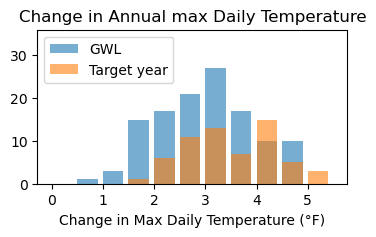

In [54]:
plt.figure(figsize=(4,2))

gwl_delta.plot.hist(width=0.4, bins = np.arange(0, 6, 0.5), alpha=0.6, label='GWL')
plt.ylim(0,36)
plt.xlabel('Change in Max Daily Temperature (°F)')

time_delta.plot.hist(width=0.4, bins = np.arange(0, 6, 0.5), alpha=0.6, label='Target year')
plt.title('Change in Annual max Daily Temperature')
plt.ylim(0,36)
plt.xlabel('Change in Max Daily Temperature (°F)')

plt.legend()

From this simple illustration we can see several important differences between the change signal in GWL and a time-based planning approach:

- More simulations are available for the GWL analysis, because the GWL method can simultaniously utilize simulations from all 3 SSPs in the LOCA2 catalog, whereas a time-based method must choose one scenario.
- The estimated change signal is slightly lower in the GWL method. This is because the GWL method allows us to use refined estimates from the IPCC about the most likely time each GWL will be reached. These estimates avoid the influence of climate models wi

